<a href="https://colab.research.google.com/github/tammyray997/NGG6050/blob/main/20240920_multiple_comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple Comparisons

In this exercise we will run through an example of correcting for multiple comparisons with both the Benjamini-Hochberg procedure and the more conservative Bonferroni correction.

First, simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations, and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant" result (of rejecting the NULL hypothesis that the samples come from distributions with equal means).

Second, once you have the simulated p-values, apply both methods to address the multiple comparisons problem.

Third, set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?

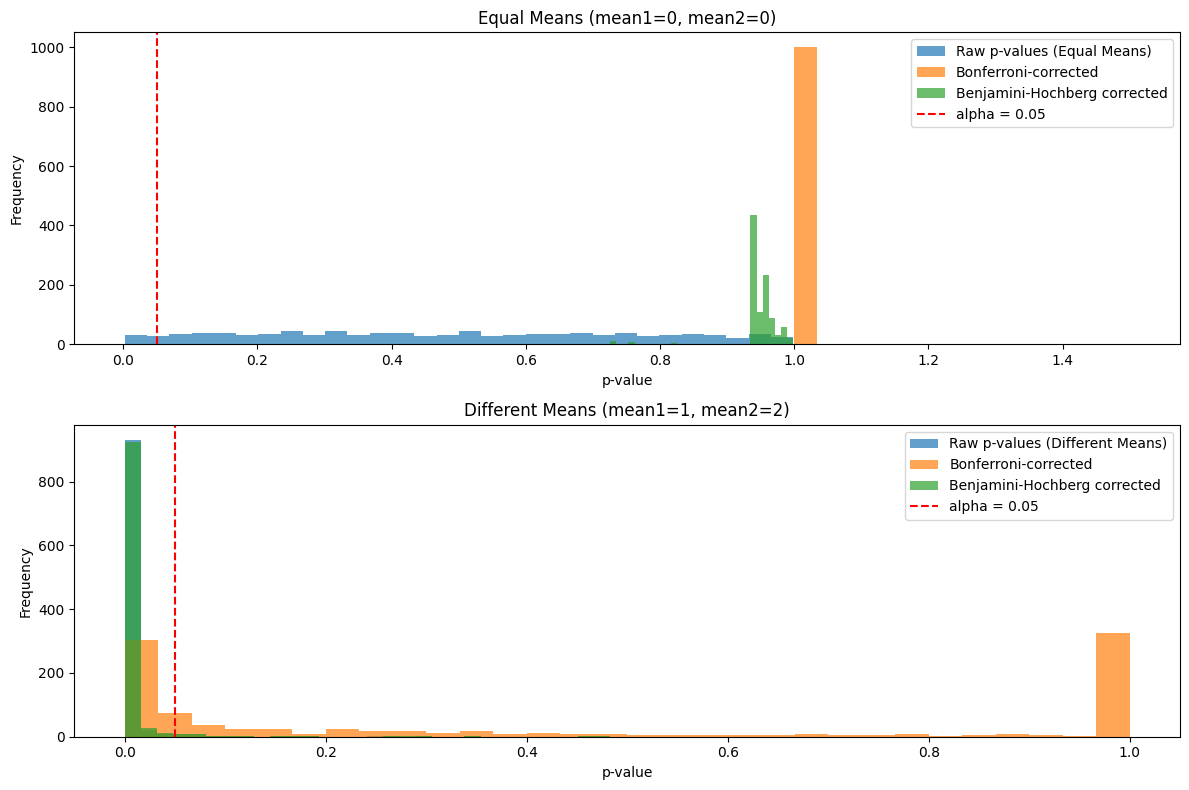

In [1]:
import numpy as np
import scipy.stats as st
import statsmodels.stats.multitest as smm
import matplotlib.pyplot as plt

# Parameters
n_tests = 1000       # Number of t-tests
n_per_group = 30     # Sample size per group
alpha = 0.05         # Significance level

# Step 1: Simulate 1000 t-tests with equal means
np.random.seed(42)   # For reproducibility
mean1, mean2 = 0, 0  # Equal means
std1, std2 = 1, 1    # Equal standard deviations
p_values_equal_means = []

for _ in range(n_tests):
    sample1 = np.random.normal(mean1, std1, n_per_group)
    sample2 = np.random.normal(mean2, std2, n_per_group)
    t_stat, p_value = st.ttest_ind(sample1, sample2)
    p_values_equal_means.append(p_value)

p_values_equal_means = np.array(p_values_equal_means)

# Step 2: Apply Bonferroni and Benjamini-Hochberg corrections

# Bonferroni correction
p_bonferroni = np.minimum(p_values_equal_means * n_tests, 1)

# Benjamini-Hochberg procedure
_, p_bh, _, _ = smm.multipletests(p_values_equal_means, alpha=alpha, method='fdr_bh')

# Step 3: Simulate t-tests with different means (mean1=1, mean2=2)

mean1, mean2 = 1, 2  # Different means
p_values_diff_means = []

for _ in range(n_tests):
    sample1 = np.random.normal(mean1, std1, n_per_group)
    sample2 = np.random.normal(mean2, std2, n_per_group)
    t_stat, p_value = st.ttest_ind(sample1, sample2)
    p_values_diff_means.append(p_value)

p_values_diff_means = np.array(p_values_diff_means)

# Apply corrections to the new p-values
p_bonferroni_diff = np.minimum(p_values_diff_means * n_tests, 1)
_, p_bh_diff, _, _ = smm.multipletests(p_values_diff_means, alpha=alpha, method='fdr_bh')

# Step 4: Plotting results
plt.figure(figsize=(12, 8))

# Plot for equal means
plt.subplot(2, 1, 1)
plt.hist(p_values_equal_means, bins=30, alpha=0.7, label='Raw p-values (Equal Means)')
plt.hist(p_bonferroni, bins=30, alpha=0.7, label='Bonferroni-corrected')
plt.hist(p_bh, bins=30, alpha=0.7, label='Benjamini-Hochberg corrected')
plt.axvline(x=alpha, color='r', linestyle='--', label='alpha = 0.05')
plt.title('Equal Means (mean1=0, mean2=0)')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()

# Plot for different means
plt.subplot(2, 1, 2)
plt.hist(p_values_diff_means, bins=30, alpha=0.7, label='Raw p-values (Different Means)')
plt.hist(p_bonferroni_diff, bins=30, alpha=0.7, label='Bonferroni-corrected')
plt.hist(p_bh_diff, bins=30, alpha=0.7, label='Benjamini-Hochberg corrected')
plt.axvline(x=alpha, color='r', linestyle='--', label='alpha = 0.05')
plt.title('Different Means (mean1=1, mean2=2)')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
